## The "liamometer" linear regression of IMDB ratings part I: EDA

--- 

### Notebook roadmap: 
    - Clean the dataset
        - Read in data
        - Handle null values
        - Handle money strings

---

### Project summary: 

The liamometer is an interpretive model that asks the question: what if all viewers cared about were films from unknown international distributors? It serves as a hopeful vehicle for better representation in the movie industry. The project scraped data on thousands of movies from 2017-2020 and intends to capture the contemporary taste of viewers.

View the liamometer: http://liamisaacs.com/liamometer

In [1]:
import pandas as pd
import missingno as mno

---

Read in data 

---

In [4]:
#Mojo = BoxOfficeMojo 2017-2020 data, tutorial available here: https://yeqiuu.medium.com/tutorial-scraping-boxofficemojo-with-scrapy-299e7b35254e
mojo = pd.read_csv('data/mojo.csv')
#IMDB = IMDB data for all movies in Mojo
imdb = pd.read_csv('data/imdb.csv')

#Setting indexes for proper merging later

imdb.set_index(['mojo_title'])
mojo.set_index(['mojo_title'])

mojo.head(1)

,mojo_title,domestic_revenue,international_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Made in France,"$9,956",NaN,"$9,956",Under The Milky Way,"$3,688",2 theaters,NaN,NaN,"Crime, Drama, Thriller","Sep 23, 2016"


In [5]:
df = mojo.merge(imdb, on='mojo_title', how='left')
print('We will use BoxOfficeMojo combined with IMDB data for our linear regerssion model.')
print('There are ', df.shape[0], 'movies, and ', df.shape[1], 'features.')

We will use BoxOfficeMojo combined with IMDB data for our linear regerssion model.
There are  3659 movies, and  15 features.


----

### Handle nulls 

Budget is way too spotty. Other information like MPAA rating is not useful for our motivation for the project.

---

In [6]:
df.drop(columns=['budget', 'MPAA', 'imdbpicture', 'imdbcount', 'imdb_metacritic', 'release_days', 'opening_theaters'], inplace=True)
df = df.dropna(subset=['imdbscore'])

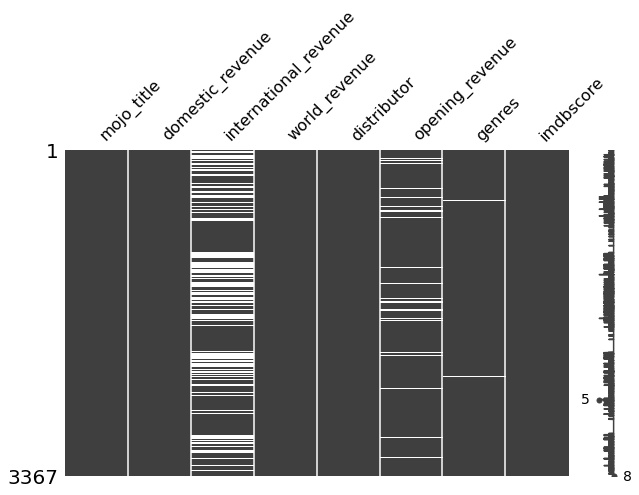

In [9]:
#white = missing
mno.matrix(df, figsize = (10, 6))

----

### Handle money strings 

Change "$2,000" to 2000

---

In [10]:
# turn $2,000 into 2000

# money = ['domestic_revenue', 'international_reveneue', 'world_revenue', 'opening_revenue']
# for i in range(0, len(money)):
#     df[money[i]] = df[money[i]].replace(',', '')
#     df[money[i]] = df[money[i]].replace('$', '')
#     df[money[i]] = pd.to_numeric(df[money[i]])

df['domestic_revenue'] = df['domestic_revenue'].str.replace(',', '')
df['domestic_revenue'] = df['domestic_revenue'].str.replace('$', '')
df['domestic_revenue'] = pd.to_numeric(df['domestic_revenue'])
df['international_revenue'] = df['international_revenue'].str.replace(',', '')
df['international_revenue'] = df['international_revenue'].str.replace('$', '')
df['international_revenue'] = pd.to_numeric(df['international_revenue'])
df['world_revenue'] = df['world_revenue'].str.replace(',', '')
df['world_revenue'] = df['world_revenue'].str.replace('$', '')
df['world_revenue'] = pd.to_numeric(df['world_revenue'])
df['opening_revenue'] = df['opening_revenue'].str.replace(',', '')
df['opening_revenue'] = df['opening_revenue'].str.replace('$', '')
df['opening_revenue'] = pd.to_numeric(df['opening_revenue'])

In [15]:
#Condense to function
def get_clean_data(mojo, imdb): 
    
    mojo.set_index(['mojo_title'])
    imdb.set_index(['mojo_title'])
    
    df = mojo.merge(imdb, on='mojo_title', how='left')
    
    df.drop(columns=['budget', 'MPAA', 'imdbpicture', 'imdbcount', 'imdb_metacritic', 'release_days', 'opening_theaters'], inplace=True)
    df = df.dropna(subset=['imdbscore'])
    
    money_cols = ['domestic_revenue', 'international_revenue', 'world_revenue', 'opening_revenue']
    
    for i in money_cols: 
        df[i] = df[i].str.replace(',', '')
        df[i] = df[i].str.replace('$', '')
        df[i] = pd.to_numeric(df[i])
    
    return df

df_new = get_clean_data(mojo, imdb)

In [17]:
df_new.head(2)

,mojo_title,domestic_revenue,international_revenue,world_revenue,distributor,opening_revenue,genres,imdbscore
0,Made in France,9956,NaN,9956,Under The Milky Way,3688.0,"Crime, Drama, Thriller",6.2
1,Realms,147,22296.0,22443,The Film Arcade,108.0,"Horror, Mystery",5.5
